# 2 Week : Optimization 과제

# Q1. Optimizer 실습

- 수업에서 배운 Optimizer를 직접 구현을 해보는 것을 목표로 합니다
- Q1은 크게 두가지 파트로 나뉘어져 있습니다.
- 1. $f(x,y)$를 미분한 $∇f(x,y)$를 찾기 2. 각 optimizer 구현하기
- 각 코드를 구현 후 시각화 코드를 입력해놓았으니 그대로 출력 하시면 됩니다
//
* 유의사항 : 시각화를 위해 결과의 형식을 지정해놓았습니다. 이와 다르게 하시면 출력이 제대로 안 될 수 있으니 이에 맞게 지정해주세요 :)


## Q1.1 $\nabla f(x,y)$를 구해주세요

✨유의사항 : np.array$([ \nabla_x f(x,y),\nabla_y f(x,y)])$ 형태로 return 해주세요  

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 함수를 정의
def f(x, y):
    return -x**2 + y**2

# 그래디언트 정의
def grad_f(x, y):
    dx = -2 * x
    dy = 2* y
    return np.array([  dx   ,     dy   ])


## Q1.2 각 Optimizer를 구현해주세요

- **SGD**: $\theta_{t+1} = \theta_t - \eta\cdot \nabla f(\theta_t)$

- **Momentum**:
    - $v_t = \gamma \cdot v_{t-1} + \eta \cdot\nabla f(\theta_t)$
    - **파라미터 업데이트** :  $\theta_{t+1} = \theta_t - v_t$

- **RMSprop**:
    - $g_t = \rho \cdot g_{t-1} + (1-\rho)\cdot g_t$
   
    - **파라미터 업데이트** :  $\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} \nabla f(\theta_t)$

- **Adam**:
    - $m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla f(\theta_t)$
    - $v_t = \beta_2 v_{t-1} + (1 - \beta_2) (\nabla f(\theta_t))^2$
    - $\hat{m}_t = \frac{m_t}{1 - \beta_1^t}$
    - $\hat{v}_t = \frac{v_t}{1 - \beta_2^t}$
    - **파라미터 업데이트** :  $\theta_{t+1} = \theta_t - \frac{\eta \hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$





✨ 유의사항 :


1. 각 코드에서 ***어떤 파트인지 주석***으로 적어주세요 \\
ex) \\
`theta = theta + update  ## 파라미터 업데이트 항` \\
`momentum = ~~~~ ## momentum 항`
2.   각 함수의 return은 update 된 ***x,y***로 넣어주세요 \\
`ex) return x - lr * gradient , y - lr * gradient`
3.   lr / rho / beta 와 같은 각 값은 ***최대한 건들이지 말아주세요***. \\
시각화 하기에 좋은 파라미터로 맞춰놔서 시각화가 이상해질수도 있어요 :(
4. 정 모르시겠다면 Q2. 에 SGD 구현 예시를 해놓았습니다. Q2 처럼 해주시면 됩니다

In [38]:
def sgd(x, y, lr=0.1):
    dx, dy = grad_f(x, y)
    x -= lr * dx
    y-= lr * dy
    return x , y

def momentum(x, y, lr=0.1, momentum=0.001):
    global v
    grad = grad_f(x, y)
    v = momentum * v - lr * grad
    x += momentum * v[0] - lr * grad[0]
    y += momentum * v[1] - lr * grad[1]
    return x, y

def rmsprop(x, y, lr=0.1, rho=0.9, epsilon=1e-6):
    global g
    grad = grad_f(x, y)
    g = rho * g + (1- rho) * g
    w_lr = lr / (np.sqrt(g + epsilon))*grad
    x -= w_lr[0]*grad[0]
    y -= w_lr[1] * grad[1]
    return x , y 

def adam(x, y, lr=0.1, beta1=0.9, beta2=0.9, epsilon=1e-8):
    global m, v, t
    t +=1
    grad = grad_f(x,y)
    m = beta1 * m +(1-beta1) * grad
    v = beta2 * m +(1-beta2) * (grad**2)
    m_hat = m/(1-beta1**t)
    v_hat = v/(1-beta2**t)
    x -= lr*m_hat[0]/(np.sqrt(v_hat[0])+epsilon)
    y -= lr*m_hat[1]/(np.sqrt(v_hat[1])+epsilon)
    return x, y


## Q1.3 시각화를 통한 특성 파악

- 어떤 Optimizer가 좋은지에 대한 정답은 없습니다.
- 그냥 결과를 보시고 각 Optimizer가 학습된 특성을 적어주세요 ex) 기울기를 착실하게 따라간다.



✨유의사항

- Momentum / RMSprop / Adam의 초기파라미터 v,g,m 및 t 도 0으로 맞춰주세요 ( 사용자가 짠 코드에 따라 변수명은 달라져도 됩니다)
- 다르게 나올 경우 예시와 같은 사진으로 최대한 맞춰주세요 :)






================================================================================

***Answer)***



SGD :global minimum에 도달

Momentum : 천천히 global minimum 에 가는중

RMSProp : 일정하게 감소중

Adam : 제대로 가는지 모르겠음

================================================================================

In [39]:
# 시각화 전 초기 파라미터 세팅하기 (예시)
# Momentum, RMSprop, Adam 알고리즘을 위한 변수 초기화 - 모두 0으로 초기화시켜주세요
v = np.array([0.0, 0.0])
g = np.array([0.0, 0.0])
m = np.array([0.0, 0.0])
t = 0

<ipython-input-38-fedaac5fe1db>:46: RuntimeWarning: invalid value encountered in scalar power
  y -= lr * my_corr / (vy_corr + epsilon)**0.5  # y 파라미터 업데이트


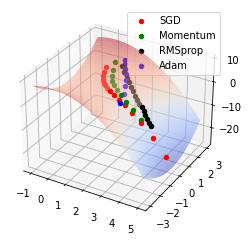

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.linspace(-1., 5, 100)
Y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)
ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.5,zorder=0)

# 초기 시작점을 설정
points = {
    'SGD': [0.3, 2],
    'Momentum': [0.5, 2.5],
    'RMSprop': [0.7, 2.3],
    'Adam': [0.9, 2.4]
}


# 각 알고리즘의 색상을 설정
colors = {'SGD': 'red', 'Momentum': 'green', 'RMSprop': 'black', 'Adam': 'blue'}

# 각 알고리즘을 실행하고 결과를 플롯에 추가합니다.
steps = 15
for step in range(steps):
    for key, (x, y) in points.items():
        if key == 'SGD':
            x, y = sgd(x, y)
        elif key == 'Momentum':
            x, y = momentum(x, y)
        elif key == 'RMSprop':
            x, y = rmsprop(x, y)
        elif key == 'Adam':
            x, y = adam(x, y)
        points[key] = [x, y]
        ax.scatter(x, y, f(x, y), color=colors[key], label=key if step == 0 else "")

# 범례 추가
ax.legend()
plt.show()

#Q2. Learning Rate

- Learning Rate의 효과에 대해 알아봅니다
- 여러 local minimum이 있는 함수에 갇히지 않고 global minimum로 갈 수 있는 learning rate를 찾는 것을 목표로 합니다.

## Q2.1 $\nabla f(x,y)$를 구해주세요

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function with local and global minima
def f(x, y):
    return (x**2 + y**2 - 1)**2 + 1 * np.sin(5 * x) + 1 * np.sin(5 * y)

# Define the gradients
def grad_f(x, y):
    dx = 2*(x**2 + y**2 -1)*2*x + 5*np.cos(5 * x)
    dy = 2*(x**2 + y**2 -1)*2*y + 5*np.cos(5 * y)
    return np.array([dx, dy])


## Q2.2 적절한 learning rate를 찾아주세요

### learning_rate를 정해주세요

- 범위는 (0.0001~0.05) 입니다.
- learning_rate는 최대 세 개까지 넣을 수 있게 해놨습니다.
- 위 범위에서 50에포크동안 local minimum에 빠지지 않고 global minimum로 가는 learning rate를 코드 실행 / 시각화를 통해 찾아주세요
- global minimum으로 가는 learning_rate 중 가장 작은 learning rate를 적어주세요




================================================================================

***최적의 learning_rate***  0.005:

================================================================================

<ipython-input-49-a574a26a840d>:28: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.5, zorder=0)


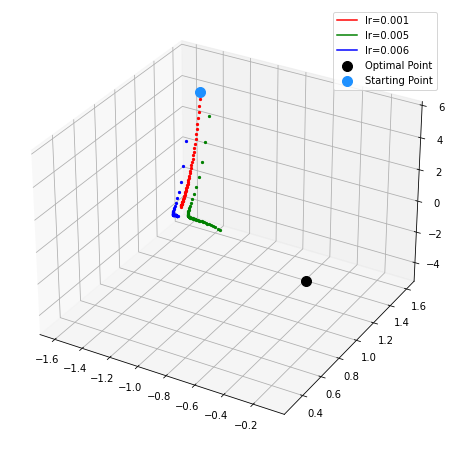

In [49]:

learning_rates = [0.001, 0.005, 0.006]




# =================================================
# 시각화 세팅 파트 (그냥 실행시켜주시면 됩니다) ===
# =================================================
# Gradient Descent Algorithm (SGD)
def sgd(x, y, lr=0.1):
    grad = grad_f(x, y)
    return x - lr * grad[0], y - lr * grad[1]

# Initialize the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
X = np.linspace(-1.6, -0.1, 100)
Y = np.linspace(0.3, 1.6, 100)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)
# Set the z-axis limit
zlim_min, zlim_max = -5, 6
ax.set_zlim(zlim_min, zlim_max)

# Mask Z values outside the zlim range
Z = np.where((Z >= zlim_min) & (Z <= zlim_max), Z, np.nan)

ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.5, zorder=0)

ax.scatter(-0.3146579, 0.94397367, f(0.94397367, -0.3146579), color='black', s=100, zorder=3, label='Optimal Point')
ax.scatter(-1.3, 1.3, f(-1.3, 1.3), color='dodgerblue', s=100, zorder=3, label='Starting Point')

# Initialize the points with slight variations
initial_points = [
    [-1.3, 1.3],
    [-1.25, 1.35],
    [-1.35, 1.25]
]

# Colors for different learning rates
colors = ['red', 'green', 'blue']
labels = [f'lr={lr}' for lr in learning_rates]

# ===============================================
# Optimizer 파트 , 에포크는 50으로 고정합니다 ===
# ===============================================

steps = 50
for lr, color, label, initial_point in zip(learning_rates, colors, labels, initial_points):
    x, y = initial_point

    for step in range(steps):
        x, y = sgd(x, y, lr)
        ax.scatter(x, y, f(x, y), color=color, s=5, zorder=4)
    ax.plot([], [], color=color, label=label)

# Add legend
ax.set_zlim(-5, 6)
ax.legend()
plt.show()


## Q 2.3

### 위 실험을 통해 얻은 경험으로 learning_rate가 높을 때 / 낮을 때 장단점을 적어주세요 +추가로 탐색하여 적어주셔도 좋습니다

너무 높으면 minimum 에 도달 못하고, 너무 낮으면 local minimum에 도달함